In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
path=("automobile.csv")
df=pd.read_csv(path)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df.head(6)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns=headers

In [4]:
df1=df.replace('?',np.nan)

In [5]:
df=df1.dropna(subset=["price"],axis=0)

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
df.reset_index(drop=True,inplace=True)

In [8]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    164
True      37
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    199
True       2
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
Fa

In [11]:
avg=df['normalized-losses'].astype(float).mean(axis=0)
df['normalized-losses'].replace(np.nan,avg,inplace=True)

In [12]:
avg_bore=df['bore'].astype(float).mean(axis=0)
df['bore'].replace(np.nan,avg_bore,inplace=True)

In [13]:
avg_stroke=df['stroke'].astype(float).mean(axis=0)
df['stroke'].replace(np.nan,avg_stroke,inplace=True)

In [14]:
avg_power=df['horsepower'].astype(float).mean(axis=0)
df['horsepower'].replace(np.nan,avg_power,inplace=True)

In [15]:
avg_rpm=df['peak-rpm'].astype(float).mean(axis=0)
df['peak-rpm'].replace(np.nan,avg_rpm,inplace=True)

In [16]:
df['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [17]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [18]:
df['num-of-doors'].replace(np.nan,'four',inplace=True)

In [19]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [20]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [21]:
df['city-mpg'] = 235/df["city-mpg"]
df['highway-mpg'] = 235/df["highway-mpg"]


In [22]:
df.rename(columns={'city-mpg':'city-L/100km'}, inplace=True)
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

In [23]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


In [24]:
df['length']=df['length']/12
df['length']=df['length'].round(2)

In [25]:
df['height']=df['height']/12
df['height']=df['height'].round(2)
df['width']=df['width']/12
df['width']=df['width'].round(2)

In [26]:
#predict price using simple linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['highway-L/100km']]
Y = df['price']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5] 

array([15485.52737455, 15485.52737455, 16643.34931414, 12475.19033163,
       22327.2024721 ])

In [27]:
lm.intercept_

-14617.843054664598

In [28]:
lm.coef_

array([3458.68511314])

In [234]:
#multiple linear regression
car_features = df[['horsepower', 'curb-weight', 'engine-size','highway-L/100km','symboling','normalized-losses','wheel-base','length','width','height','bore','stroke','compression-ratio','peak-rpm','city-L/100km']]
car_price=df['price']
lm.fit(car_features,car_price)
price=lm.predict(car_features)
price[0:5]


array([13164.26404715, 13164.26404715, 18093.37299063, 11535.28546717,
       16779.55171896])

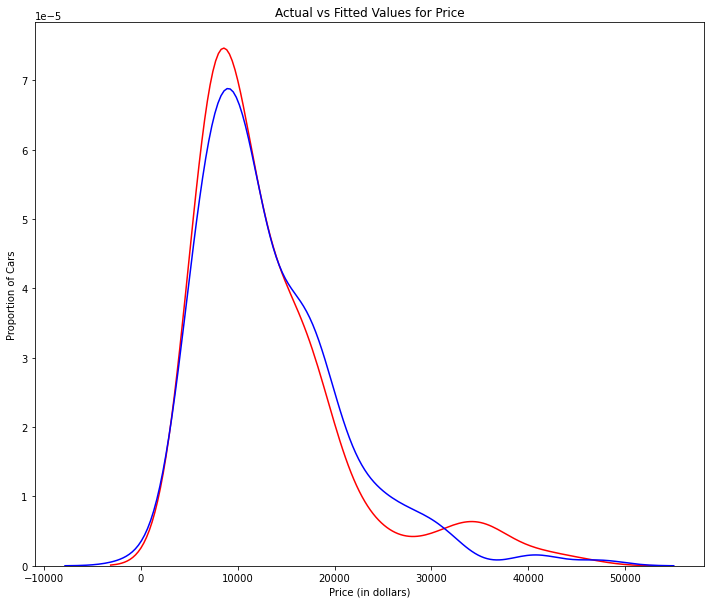

In [235]:
width = 12
height = 10
Y_hat = lm.predict(car_features)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [236]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(include_bias=False,degree=3)
Z_pr=pr.fit_transform(car_features)
lm.fit(Z_pr,car_price)
predict_price=lm.predict(Z_pr)
f[0:6]

array([14997.49688972, 14997.49688972, 16499.98859258, 13949.99682822,
       17449.98789342, 15250.00238751])

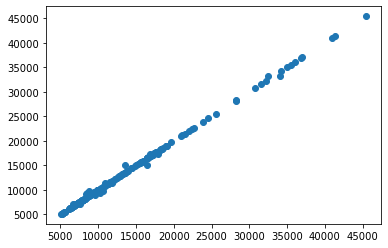

In [237]:
plt.scatter(car_price,predict_price)

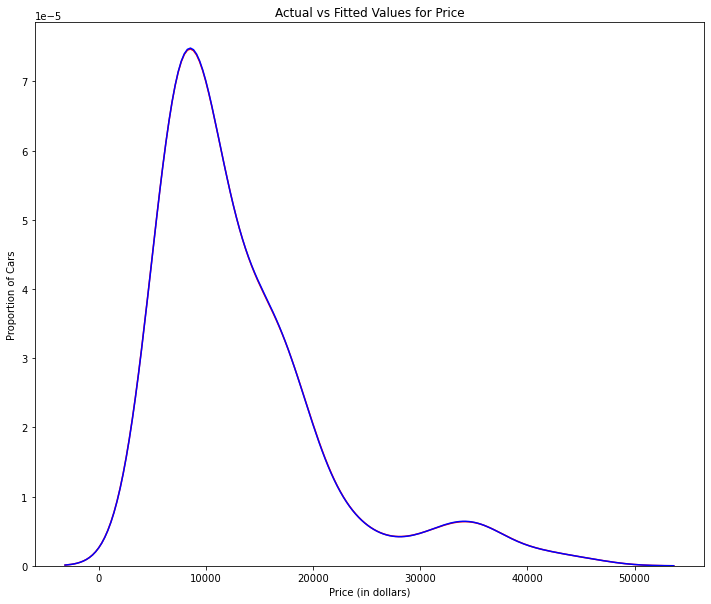

In [238]:
#distribution graph of  polynomialfeatures regression 
width = 12
height = 10
Y_hat=predict_price

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [239]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [240]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False,degree=3)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe
pipe.fit(car_features,car_price)
ypipe=pipe.predict(car_features)
ypipe[0:5]

array([15090.53125, 15090.53125, 16528.21875, 13979.28125, 17440.71875])

In [241]:
#LINEAR REGRESSION
lm.fit(X,Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.6417894513258818


In [242]:
from sklearn.metrics import mean_squared_error
price_=lm.predict(X)


In [243]:
mse = mean_squared_error(df['price'],price_)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  22510543.777085222


In [245]:
#MULTIPLE LINEAR REGRESSION
lm.fit(car_features,car_price)
print('The R-square is: ', lm.score(car_features,car_price))

The R-square is:  0.8596579019162653


In [246]:
price_multifit = lm.predict(car_features)
mse = mean_squared_error(df['price'],price_multifit)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  8819329.733240092


In [247]:
#polynomial regression
from sklearn.metrics import r2_score
r_squared = r2_score(df['price'], predict_price)
print('The R-square value is: ', r_squared)

The R-square value is:  0.9991185846418946


In [248]:
mse=mean_squared_error(df['price'], predict_price)
                       
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  55389.59999326414


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")


done


In [214]:
features =['horsepower', 'curb-weight', 'engine-size','highway-L/100km','symboling','normalized-losses','wheel-base','length','width','height','bore','stroke','compression-ratio','peak-rpm','city-L/100km']   
H = df[features]
J= df['price']

x_train, x_test, y_train, y_test = train_test_split(H, J, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples: 31
number of training samples: 170


In [223]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size','highway-L/100km','symboling','normalized-losses','wheel-base','length','width','height','bore','stroke','compression-ratio','peak-rpm','city-L/100km']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size','highway-L/100km','symboling','normalized-losses','wheel-base','length','width','height','bore','stroke','compression-ratio','peak-rpm','city-L/100km']])


In [227]:

RigeModel=Ridge(alpha=4)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_train_pr, y_train)

0.9793515940855005

In [228]:
rige_price = RigeModel.predict(x_train_pr)
rige_price[0:6]

array([ 9013.89857808, 10311.51673913,  6262.5480935 , 17395.23537434,
       18192.81007168, 11882.45110345])

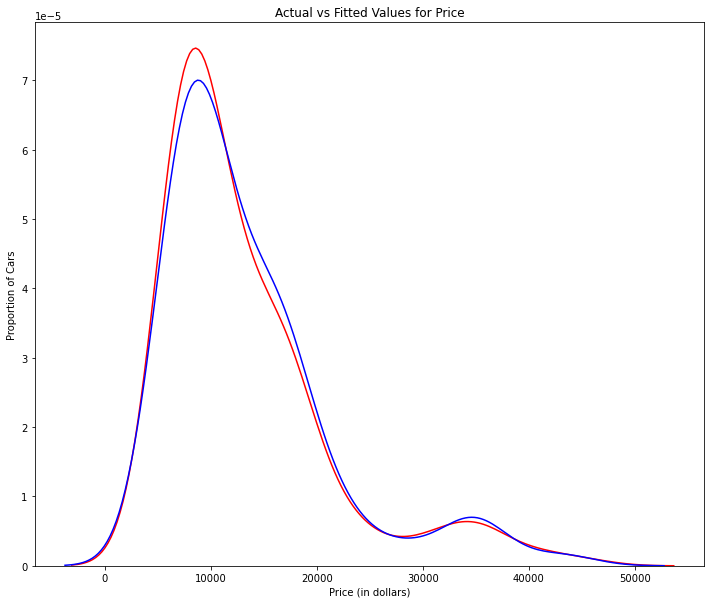

In [229]:
#distribution graph of ridge regression 
width = 12
height = 10
Y_hat=rige_price

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

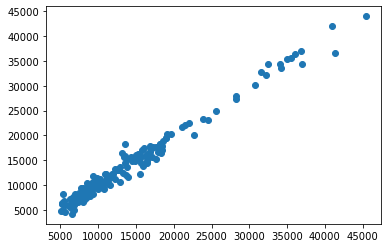

In [192]:
plt.scatter(y_train,rige_price)